In [5]:
from bayesian_optimization import BayesianOptimization
import pandas as pd 
from botorch.test_functions import Ackley
from botorch.test_functions import Levy 
from botorch.test_functions import Hartmann

# Variables that determine the size of the dataset
N_INITIAL = 50
EPOCHS = 10
BATCH_SIZE = 5
DIM = 6
LOWER = 0
UPPER = 1

optimizer = BayesianOptimization(fun=Hartmann(dim=DIM,negate=True), 
                                 batch_size=BATCH_SIZE, 
                                 dim=DIM, 
                                 epochs=EPOCHS, 
                                 n_init=N_INITIAL, 
                                 lower_bound=LOWER,
                                 upper_bound=UPPER,
                                 seed=5,
                                 acqf_type='qUCB')

x_max, y_max = optimizer.run()
data = optimizer.get_data()
full = optimizer.format(data, dim=DIM, n_init=N_INITIAL, batch_size=BATCH_SIZE, epochs=EPOCHS)
display(full)

,Batch,x1,x2,x3,x4,x5,x6,y
0,0.0,0.480291,0.117259,0.123990,0.346232,0.213475,0.548146,1.724616
1,0.0,0.905827,0.613882,0.696716,0.659639,0.867132,0.430792,0.003003
2,0.0,0.666464,0.258490,0.331307,0.100947,0.707934,0.122735,0.014876
3,0.0,0.217002,0.754144,0.973490,0.912768,0.368671,0.990001,0.148694
4,0.0,0.058460,0.389046,0.600919,0.828908,0.404407,0.672242,0.195340
...,...,...,...,...,...,...,...,...
95,10.0,0.802352,0.283242,0.353698,0.443112,0.567654,0.230239,0.063996
96,10.0,0.075744,0.016689,0.402061,0.360044,0.613150,0.551124,0.804227
97,10.0,0.251794,0.952642,0.976935,0.397428,0.802001,0.938416,0.003538
98,10.0,0.461534,0.259653,0.412206,0.870755,0.619303,0.983221,0.016865


In [9]:
TOTAL = N_INITIAL + EPOCHS*BATCH_SIZE
DIM = 6
LOWER = 0
UPPER = 1
hart = Hartmann(dim=DIM,negate=True)
hart.bounds[0, :].fill_(LOWER) # Bounds of the function
hart.bounds[1, :].fill_(UPPER)

tensor([1., 1., 1., 1., 1., 1.], dtype=torch.float64)

,x1,x2,x3,x4,x5,x6,y
0,0.480291,0.117259,0.123990,0.346232,0.213475,0.548146,1.724616
1,0.905827,0.613882,0.696716,0.659639,0.867132,0.430792,0.003003
2,0.666464,0.258490,0.331307,0.100947,0.707934,0.122735,0.014876
3,0.217002,0.754144,0.973490,0.912768,0.368671,0.990001,0.148694
4,0.058460,0.389046,0.600919,0.828908,0.404407,0.672242,0.195340
...,...,...,...,...,...,...,...
95,0.802352,0.283242,0.353698,0.443112,0.567654,0.230239,0.063996
96,0.075744,0.016689,0.402061,0.360044,0.613150,0.551124,0.804227
97,0.251794,0.952642,0.976935,0.397428,0.802001,0.938416,0.003538
98,0.461534,0.259653,0.412206,0.870755,0.619303,0.983221,0.016865


,x1,x2,x3,x4,x5,x6
0.5,0.161365,0.173095,0.045378,0.215584,0.191991,0.212586


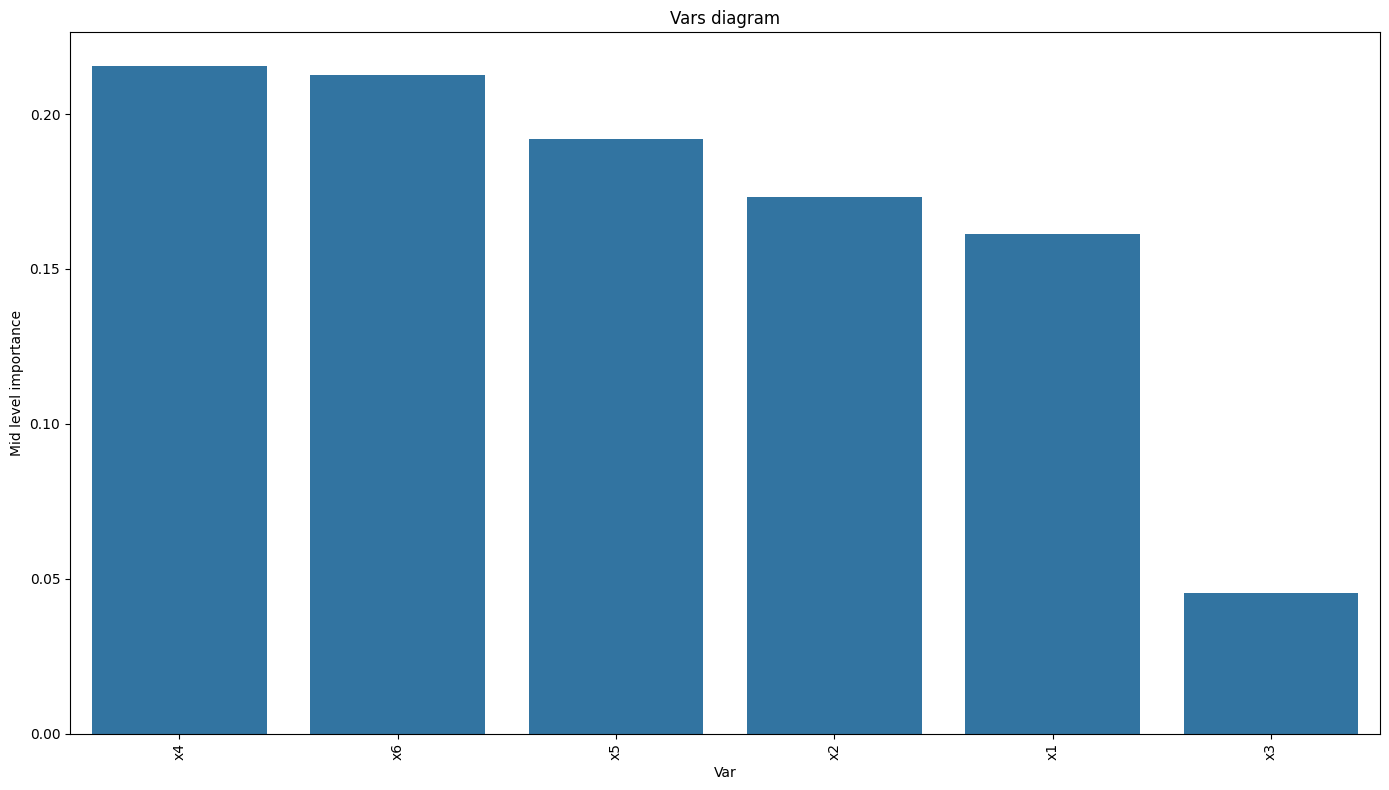

In [6]:
from varstool import DVARS
import seaborn as sns
import matplotlib.pyplot as plt

vars_data = full.drop(columns=['Batch'])

display(vars_data)
vars_data.to_csv('vars_data.csv', index=False)
h = 0.5
experiment = DVARS(data_file = 'vars_data.csv',
                   outvarname = 'y',
                   ivars_range = h,
                   phi0=1,
                   phi_max=1e6,
                   tol = 1e-6,
                   correlation_func_type='linear',
                   report_verbose=False)

experiment.run()
display(experiment.ratios)
 
data = pd.DataFrame(experiment.ratios, index=[h])
# data = data.drop(data.columns[-1], axis=1) # Dropping lipid after
data = data.T.sort_values(by=h, ascending=False).T

# Plotting the ratios
plt.figure(figsize=(14, 8))
sns.barplot(x=data.columns, y=data.iloc[0])
plt.xticks(rotation=90)
plt.title('Vars diagram')
plt.xlabel('Var')
plt.ylabel('Mid level importance')
plt.tight_layout()

plt.show()